In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#importing data
data = pd.read_csv("attribution_data_market.csv")
data.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [ ]:
column_name = data.columns
for i in column_name:
    print('Column Name: {}'.format(i))
    print(data[i].unique())

Column Name: cookie
['00000FkCnDfDDf0iC97iC703B' '0000nACkD9nFkBBDECD3ki00E'
 '0003EfE37E93D0BC03iBhBBhF' ... 'ooooEiB0CCoEf9fiiC90Dfhfk'
 'ooooiBh70D3k3BfAhDFfii9h7' 'ooooohAFofEnonEikhAi3fF9o']
Column Name: time
['2018-07-03T13:02:11Z' '2018-07-17T19:15:07Z' '2018-07-24T15:51:46Z' ...
 '2018-07-03T13:36:19Z' '2018-07-06T23:30:38Z' '2018-07-19T08:17:59Z']
Column Name: interaction
['impression' 'conversion']
Column Name: conversion
[0 1]
Column Name: conversion_value
[0.  6.5 8.  6.  7.5 7.  5.  4.5 5.5 8.5 4. ]
Column Name: channel
['Instagram' 'Online Display' 'Paid Search' 'Facebook' 'Online Video']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


In [ ]:
data.isna().sum()

cookie              0
time                0
interaction         0
conversion          0
conversion_value    0
channel             0
dtype: int64

its look there're no missing value

In [ ]:
data.duplicated().value_counts()

False    582592
True       4145
dtype: int64

In [ ]:
data[data.duplicated()].head()

,cookie,time,interaction,conversion,conversion_value,channel
92,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16T13:31:54Z,impression,0,0.0,Online Video
94,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16T13:32:19Z,impression,0,0.0,Online Video
178,0037ok3iD0h3kkEDCB0nk9iko,2018-07-11T11:54:56Z,impression,0,0.0,Online Video
181,0037ok3iD0h3kkEDCB0nk9iko,2018-07-11T11:55:46Z,impression,0,0.0,Online Video
184,0037ok3iD0h3kkEDCB0nk9iko,2018-07-11T11:55:49Z,impression,0,0.0,Online Video


# Data Cleaning & Fix Data Type

### Cookie

In [ ]:
data['cookie'].value_counts()

FDkCnkBiB7FiE9oBDC7ifn7kF    134
AiknC7ED3DnEo3EnFfk7ABok3    126
A7Boi393DfEnnf09FiA0kkE9D    120
Dh3F3hCf0inffCnD7fDfFokBo    106
kn3nokni7B9k39nk3oinhAn3B    105
                            ... 
D37ffBnFn3iokDf9i39FfnDkh      1
D37ffDChDEEhfEnFFDBCf9f3F      1
D37fhoChofA07Df9AEhDBAC7o      1
D37hCifBF90090CAFC0Dif09A      1
ooooohAFofEnonEikhAi3fF9o      1
Name: cookie, Length: 240108, dtype: int64

In [ ]:
cookie_len = data['cookie'].apply(lambda x: len(x))
cookie_len.unique()

array([25], dtype=int64)

### Time

In [ ]:
data['time']=pd.to_datetime(data['time'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   cookie            586737 non-null  object             
 1   time              586737 non-null  datetime64[ns, UTC]
 2   interaction       586737 non-null  object             
 3   conversion        586737 non-null  int64              
 4   conversion_value  586737 non-null  float64            
 5   channel           586737 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 26.9+ MB


In [ ]:
data['date'] = data['time'].dt.date
data['time'] = data['time'].dt.time

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   cookie            586737 non-null  object        
 1   time              586737 non-null  object        
 2   interaction       586737 non-null  object        
 3   conversion        586737 non-null  int64         
 4   conversion_value  586737 non-null  float64       
 5   channel           586737 non-null  object        
 6   date              586737 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 31.3+ MB


In [ ]:
data['DOW'] = data['date'].dt.day_name()
data['DOW'].value_counts()

Sunday       96832
Monday       95323
Wednesday    87179
Tuesday      84982
Thursday     79519
Saturday     75500
Friday       67402
Name: DOW, dtype: int64

In [ ]:
data.head()

,cookie,time,interaction,conversion,conversion_value,channel,date,DOW
0,00000FkCnDfDDf0iC97iC703B,13:02:11,impression,0,0.0,Instagram,2018-07-03,Tuesday
1,00000FkCnDfDDf0iC97iC703B,19:15:07,impression,0,0.0,Online Display,2018-07-17,Tuesday
2,00000FkCnDfDDf0iC97iC703B,15:51:46,impression,0,0.0,Online Display,2018-07-24,Tuesday
3,00000FkCnDfDDf0iC97iC703B,07:44:51,impression,0,0.0,Online Display,2018-07-29,Sunday
4,0000nACkD9nFkBBDECD3ki00E,09:44:57,impression,0,0.0,Paid Search,2018-07-03,Tuesday


### Interaction

In [ ]:
data['interaction'].value_counts()

impression    569098
conversion     17639
Name: interaction, dtype: int64

### Conversion

In [ ]:
data['conversion'].value_counts()

0    569098
1     17639
Name: conversion, dtype: int64

### Conversion_value

In [ ]:
data['conversion_value'].value_counts()

0.0    569098
6.5      3509
6.0      3487
5.0      1841
7.5      1833
5.5      1792
7.0      1780
8.0       866
4.5       863
4.0       835
8.5       833
Name: conversion_value, dtype: int64

### Channel

In [ ]:
data['channel'].value_counts()

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

**Cleaning is done, so we ready for exploration**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   cookie            586737 non-null  object        
 1   time              586737 non-null  object        
 2   interaction       586737 non-null  object        
 3   conversion        586737 non-null  int64         
 4   conversion_value  586737 non-null  float64       
 5   channel           586737 non-null  object        
 6   date              586737 non-null  datetime64[ns]
 7   DOW               586737 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 35.8+ MB


In [ ]:
data.head()

,cookie,time,interaction,conversion,conversion_value,channel,date,DOW
0,00000FkCnDfDDf0iC97iC703B,13:02:11,impression,0,0.0,Instagram,2018-07-03,Tuesday
1,00000FkCnDfDDf0iC97iC703B,19:15:07,impression,0,0.0,Online Display,2018-07-17,Tuesday
2,00000FkCnDfDDf0iC97iC703B,15:51:46,impression,0,0.0,Online Display,2018-07-24,Tuesday
3,00000FkCnDfDDf0iC97iC703B,07:44:51,impression,0,0.0,Online Display,2018-07-29,Sunday
4,0000nACkD9nFkBBDECD3ki00E,09:44:57,impression,0,0.0,Paid Search,2018-07-03,Tuesday


# Data Exploration

### Daily Marketing Reach by Channel

In [ ]:
print('Unique total users: {}'.format(data['cookie'].nunique()))
print("Unique users converted: {}".format(data.loc[data['conversion']==1,'cookie'].nunique()))

Unique total users: 240108
Unique users converted: 17639


In [ ]:
# user_converted/total_users
print('user conversion rate: {}'.format(17639/240108*100))

user conversion rate: 7.346277508454528


### Marketing Channel Analysis

In [ ]:
channel_count = data['channel'].value_counts(sort=True,ascending=False)
channel_count

Facebook          175741
Paid Search       151440
Online Video      113302
Instagram          75201
Online Display     71053
Name: channel, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


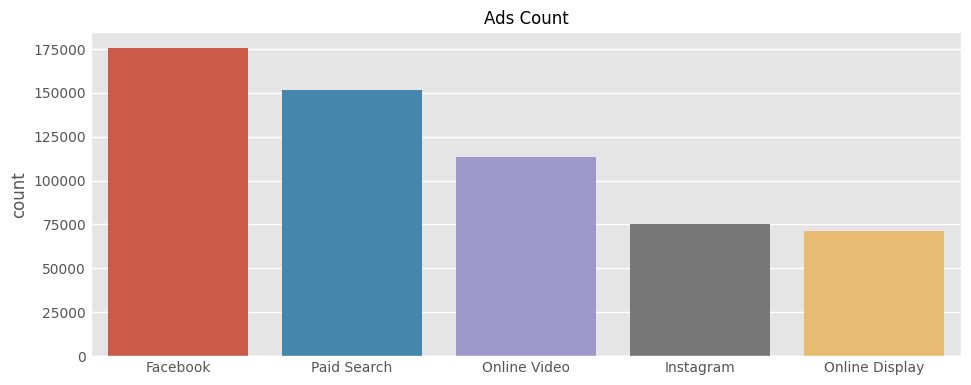

In [ ]:
plt.figure(figsize = (10,4))
ax = sns.countplot(data['channel'], order = channel_count.index)
plt.xlabel("")
plt.title("Ads Count", fontsize = 12);

In [ ]:
#pivoting the ads count by channel

daily_ads_count = data.pivot_table(values="cookie",index="date", columns="channel", aggfunc=len)
daily_ads_count.head(10)

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
date,,,,,
2018-07-01,5037,2107,2572,1649,3215
2018-07-02,6165,2629,2456,2407,5895
2018-07-03,5438,2347,2428,2397,8665
2018-07-04,5856,2447,2445,2330,8496
2018-07-05,5634,2325,6,2152,5851
2018-07-06,5289,2273,1843,1589,3873
2018-07-07,5747,2442,2173,2306,4907
2018-07-08,5409,2277,7,2867,6627
2018-07-09,4949,2113,2648,3656,5237


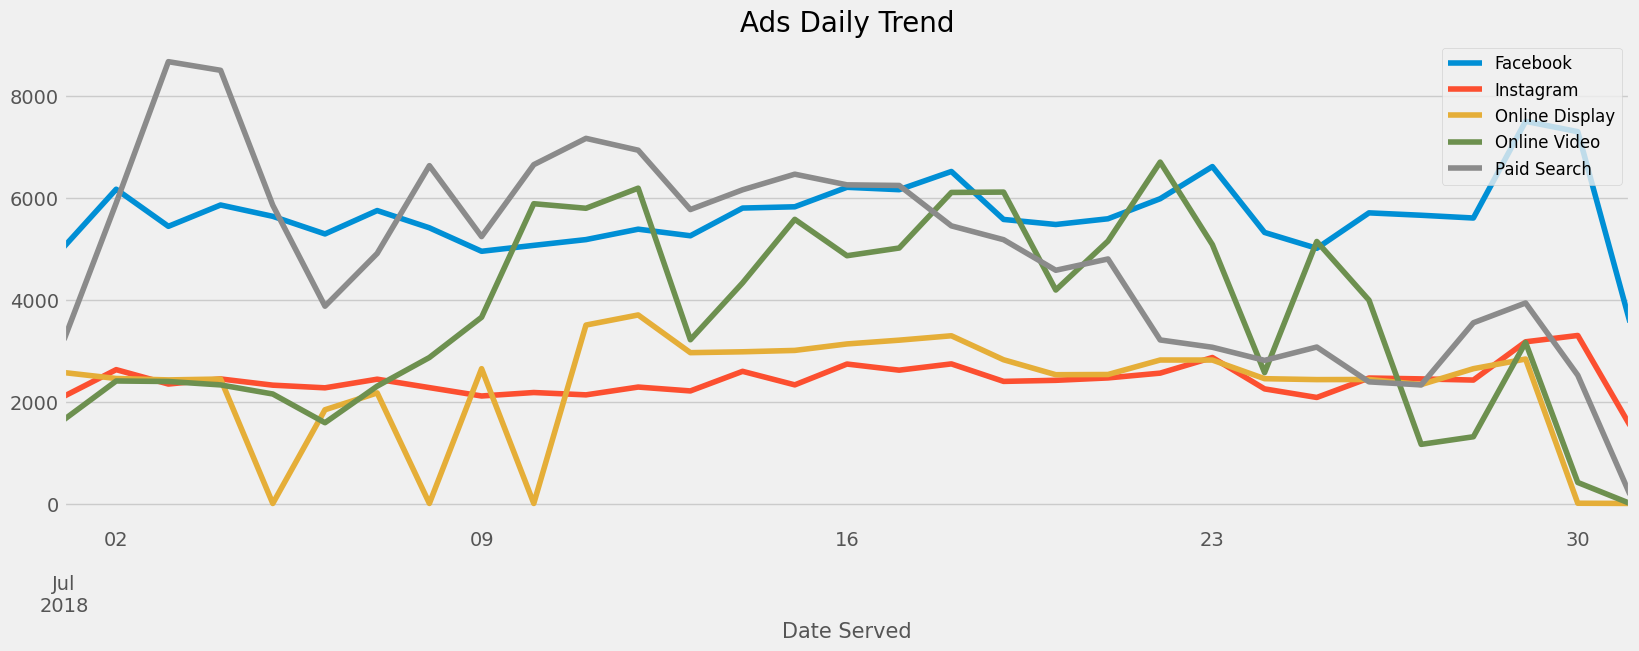

In [ ]:
plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);

* there was paid search blash on 3rd of the month, but it continued with decline towards the end of the months

* facebook and instragram ads has remained flat but sunddenly going high in the end of the month

* both online video and online display ads have ben fluctuating but online video ads tend to be flat in the middle to the end of the month

In [ ]:
conversions=data.groupby('channel')['conversion'].sum()
ads=data.groupby('channel')['conversion'].count()
conversion_data=pd.concat([conversions,ads],axis=1)
conversion_data

,conversion,conversion
channel,,
Facebook,5301,175741
Instagram,2244,75201
Online Display,2139,71053
Online Video,3408,113302
Paid Search,4547,151440


In [ ]:
conversion_data.columns=['conversions','ads_served']

In [ ]:
conversion_data['conversion_rate']=conversion_data['conversions']/conversion_data['ads_served']
conversion_data

,conversions,ads_served,conversion_rate
channel,,,
Facebook,5301,175741,0.030164
Instagram,2244,75201,0.029840
Online Display,2139,71053,0.030104
Online Video,3408,113302,0.030079
Paid Search,4547,151440,0.030025


### Conversions Analysis by Channel

In [ ]:
def conversion_rate(df, column_names):
    # Total number of converted users
    column_conv = df[df['conversion'] == 1].groupby(column_names)['cookie'].nunique()

    # Total number users
    column_total = df.groupby(column_names)['cookie'].nunique()  
    
    # Conversion rate 
    conversion_rate = round(column_conv/column_total,2)
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [ ]:
channel_convr_data = pd.DataFrame(conversion_rate(data,['date','channel']).unstack(level=1))
channel_convr_data.head(10)

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
date,,,,,
2018-07-01,0.03,0.04,0.04,0.03,0.04
2018-07-02,0.03,0.04,0.03,0.04,0.04
2018-07-03,0.04,0.03,0.03,0.04,0.04
2018-07-04,0.04,0.04,0.03,0.04,0.04
2018-07-05,0.04,0.03,0.00,0.04,0.03
2018-07-06,0.04,0.03,0.03,0.04,0.04
2018-07-07,0.04,0.04,0.03,0.04,0.04
2018-07-08,0.04,0.03,0.00,0.04,0.04
2018-07-09,0.03,0.03,0.04,0.05,0.04


In [ ]:
def plotting_conv(df,kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=kind,figsize=(20,5))
        
        plt.title(column + ' conversion rate', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.grid(False)
        plt.show()
        plt.clf();

### Day of Week

In [ ]:
DOW_conversion_data = pd.DataFrame(conversion_rate(data,['DOW','channel']).unstack(level=1))
DOW_conversion_data

channel,Facebook,Instagram,Online Display,Online Video,Paid Search
DOW,,,,,
Friday,0.04,0.04,0.04,0.05,0.04
Monday,0.04,0.03,0.04,0.05,0.04
Saturday,0.04,0.04,0.03,0.05,0.04
Sunday,0.04,0.03,0.04,0.05,0.04
Thursday,0.04,0.03,0.04,0.05,0.04
Tuesday,0.04,0.03,0.04,0.06,0.04
Wednesday,0.04,0.03,0.04,0.06,0.04


In [ ]:
# map_dict = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri',5.0: 'Sat',6.0: 'Sun'}
# DOW_conversion_data['day'] = DOW_conversion_data.index.map(map_dict)
# DOW_conversion_data

In [ ]:
#DOW_conversion_data.set_index(DOW_conversion_data['day'],inplace=True)

In [ ]:
# DOW_conversion_data.drop(columns='day',inplace=True)
# DOW_conversion_data

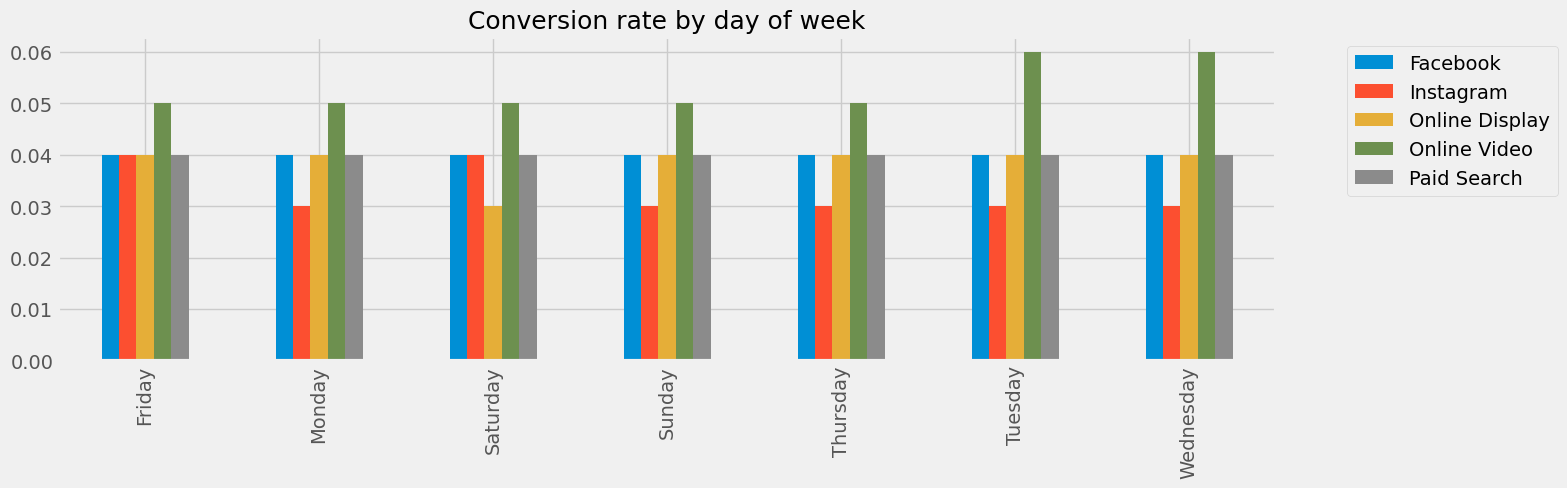

In [ ]:
DOW_conversion_data.plot(kind="bar",figsize=(14,4))
plt.title('Conversion rate by day of week',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

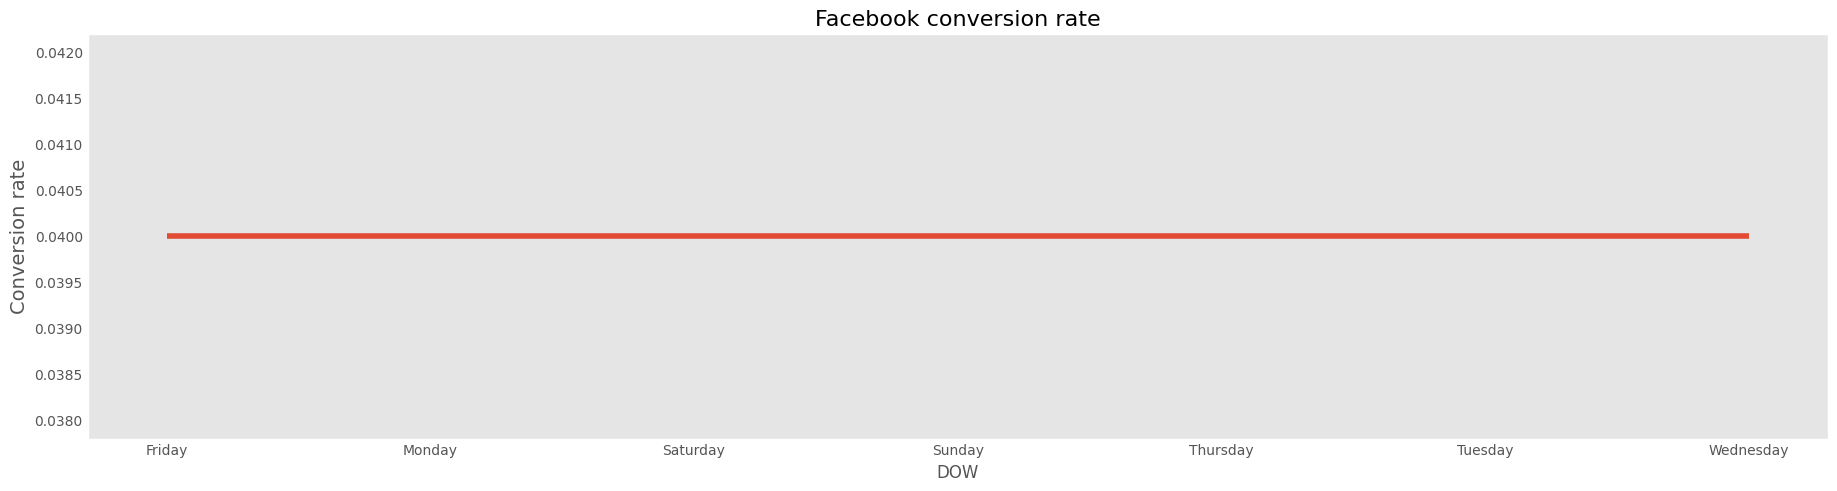

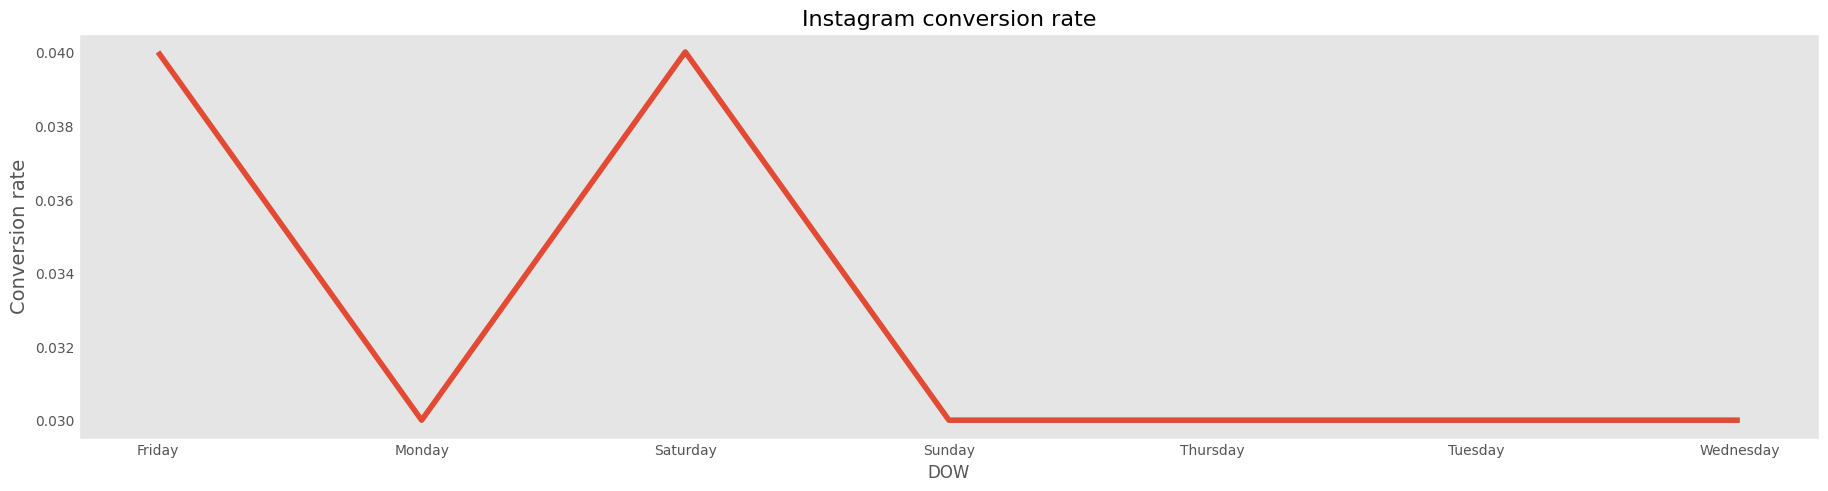

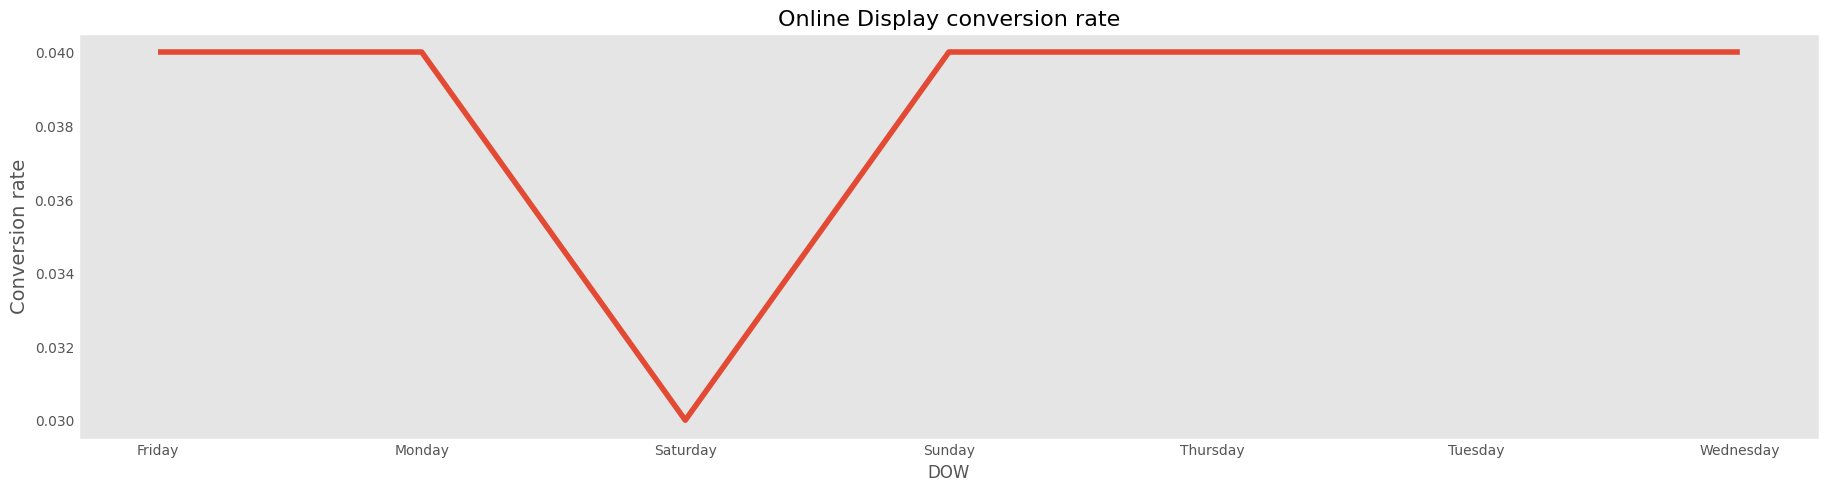

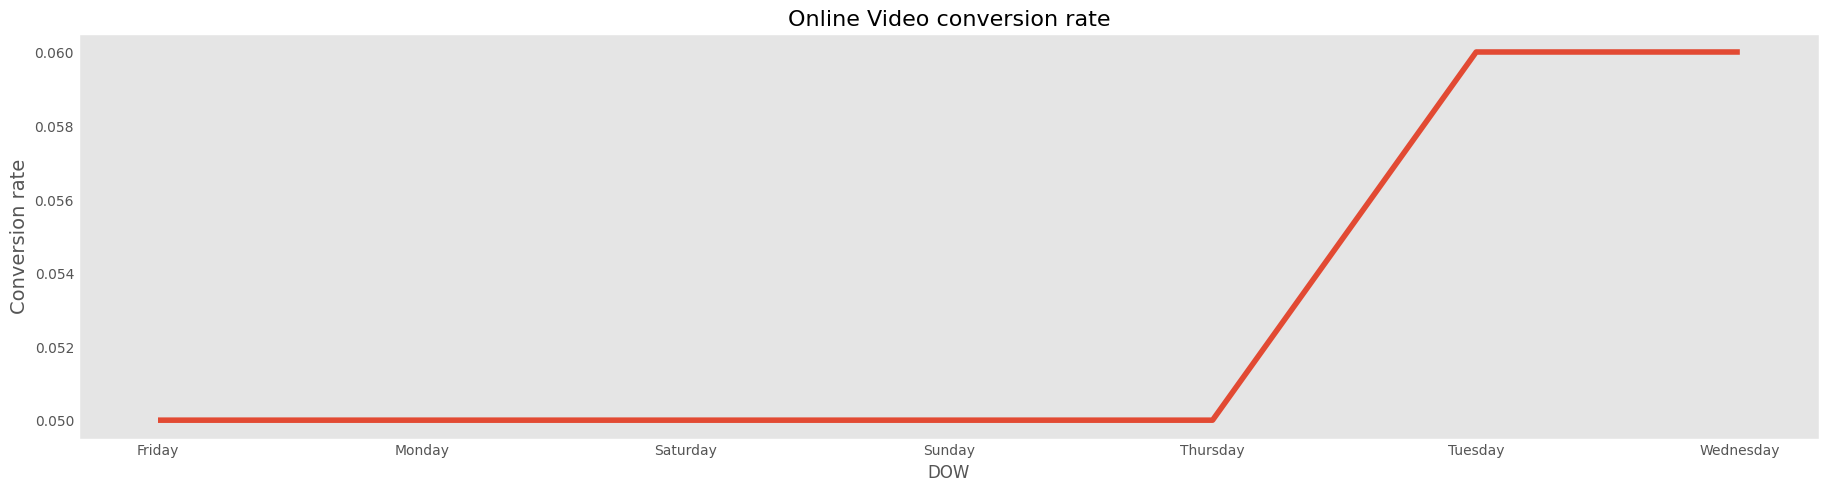

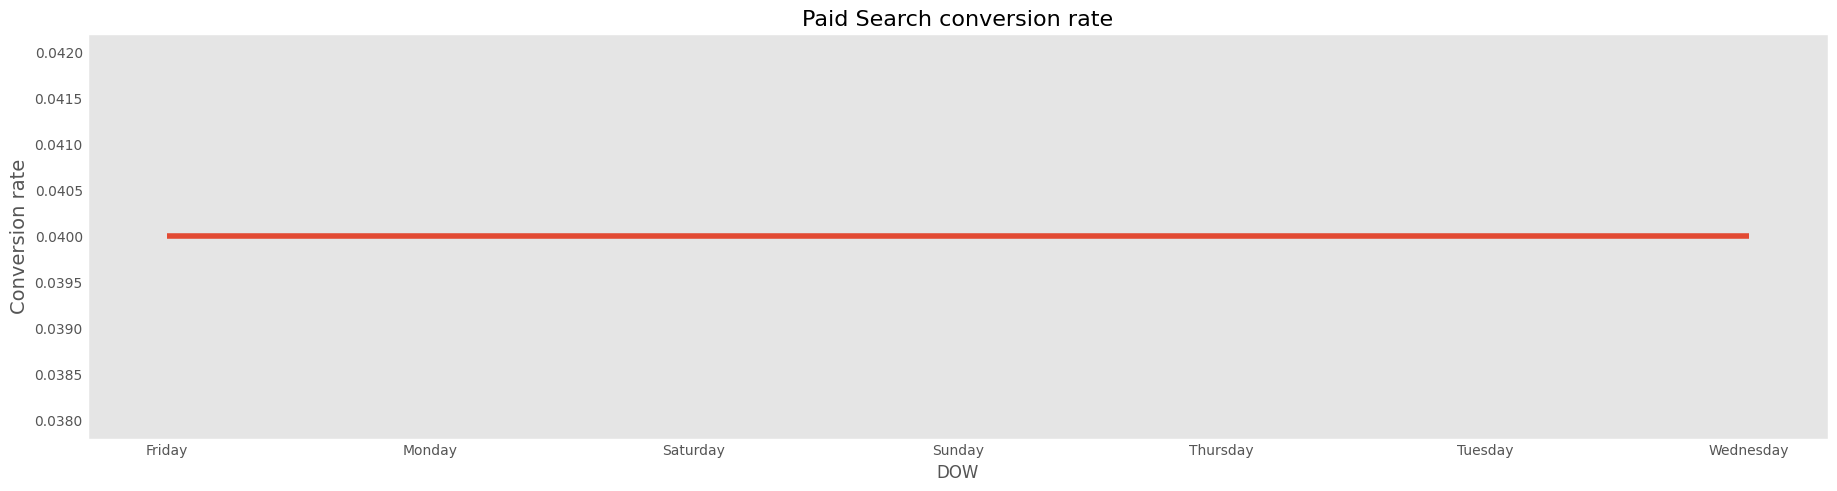

<Figure size 640x480 with 0 Axes>

In [ ]:
plotting_conv(DOW_conversion_data,"line");